In [2]:
import pandas as pd
import collections
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats

In [3]:
# load dataframe
df_all = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_allprojects.pkl')
df_success = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_successprojects.pkl')
df_fail = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_failprojects.pkl')

# calculate duration of the project in days
df_all['duration'] = (df_all['deadline'] - df_all['created_at']) / np.timedelta64(1, 'D')
df_success['duration'] = (df_success['deadline'] - df_success['created_at']) / np.timedelta64(1, 'D')
df_fail['duration'] = (df_fail['deadline'] - df_fail['created_at']) / np.timedelta64(1, 'D')


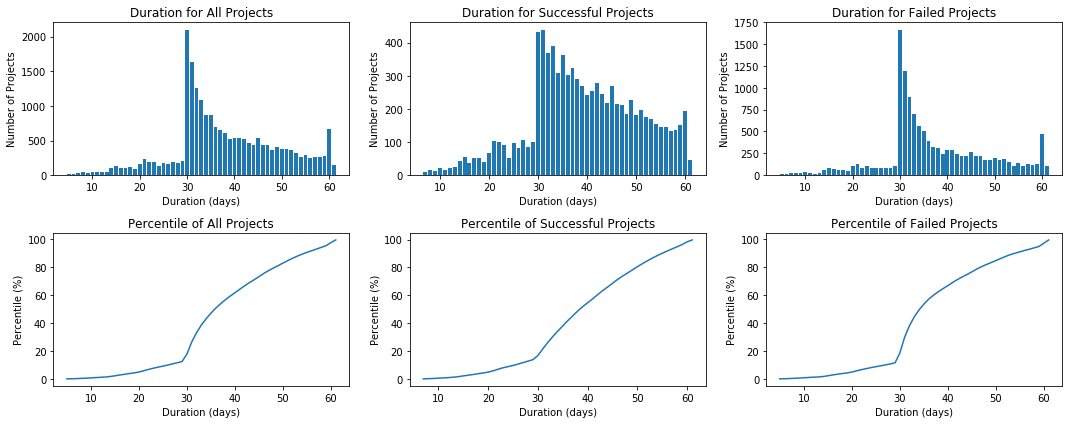

In [4]:
### DURATION FREQUENCY AND PERCENTILE

# round duration to the nearest month
df_all['rounded duration'] = list(df_all['duration'].round())
df_success['rounded duration'] = list(df_success['duration'].round())
df_fail['rounded duration'] = list(df_fail['duration'].round())

# get the frequency of each duration
duration_dict  = df_all.groupby(['rounded duration']).size().to_dict()
success_duration_dict  = df_success.groupby(['rounded duration']).size().to_dict()
fail_duration_dict  = df_fail.groupby(['rounded duration']).size().to_dict()
duration_dicts = [duration_dict, success_duration_dict, fail_duration_dict]

# plot number of projects and corresponding percentile for all/successful/failed projects
count = 0
fig = plt.figure(figsize = (15, 6))
title = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_duration_dict in duration_dicts:
    curr_duration_dict = dict((k, v) for k, v in curr_duration_dict.items() if v >= 5) # exclude outliers
    duration_lst = []
    # build list of duration of each project
    for k,v in curr_duration_dict.items():
        for i in range(v):
            duration_lst.append(k)
    duration_distr_dict = {}
    # calculate percentile of each duration
    for k in curr_duration_dict.keys():
        duration_distr_dict[k] = stats.percentileofscore(duration_lst, k)

    plt.subplot(2,3,count+1)
    plt.bar(list(curr_duration_dict.keys()),list(curr_duration_dict.values()))
    plt.xlabel('Duration (days)')
    plt.ylabel('Number of Projects')
    plt.title('Duration for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(duration_distr_dict.keys()),list(duration_distr_dict.values()))
    plt.xlabel('Duration (days)')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile of ' + title[count])
    
    count += 1

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Duration vs. Probability of Success')

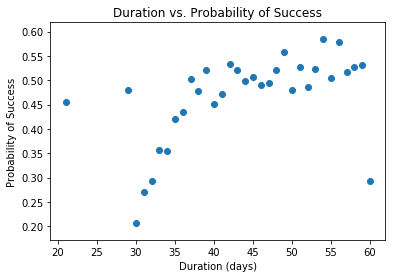

In [5]:
### PROBABILITY OF SUCCESS VS DURATION

# probability of success = number of successful projects / number of total projects given a duration
prob_success_duration_dict = {}
for k in success_duration_dict.keys():
    if duration_dict[k] > 200: # ensure sufficient number of projects
        prob_success_duration_dict[k] = success_duration_dict[k] / duration_dict[k]

plt.scatter(list(prob_success_duration_dict.keys()),list(prob_success_duration_dict.values()))
plt.xlabel('Duration (days)')
plt.ylabel('Probability of Success')
plt.title('Duration vs. Probability of Success')

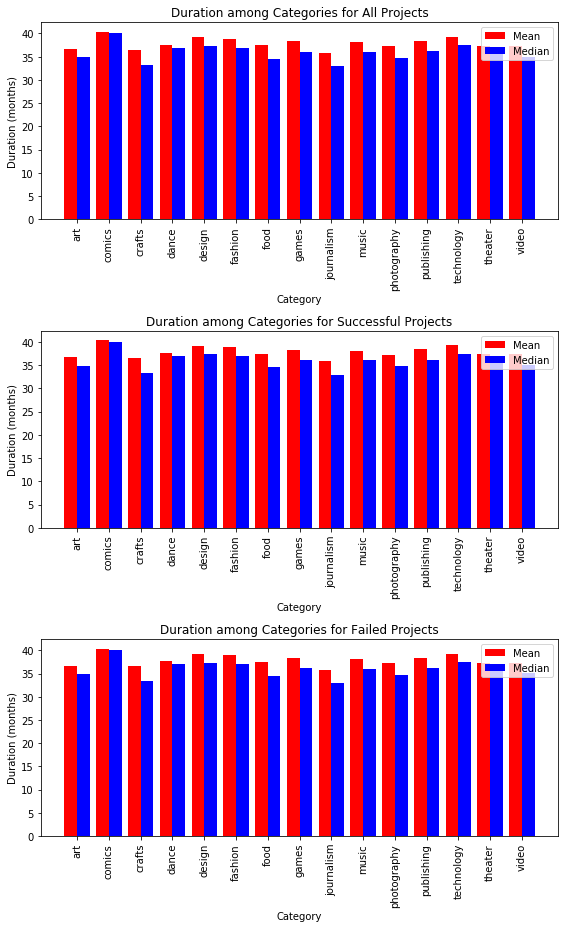

In [6]:
### DURATION FOR EACH CATEGORY

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_duration = []
    median_duration = []
    for i in category_keys:
        # subset dataframe for all projects with that category
        temp = df_all.loc[df_all['category'] == i]
        curr_duration = list(temp['duration'])
        # calculate mean and median durations for that category
        mean_duration.append(sum(curr_duration) / len(curr_duration))
        median_duration.append(statistics.median(curr_duration))

    # plotting
    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_duration, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_duration, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('Duration among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('Duration (months)')
    
    count += 1
    
plt.tight_layout()
plt.show()

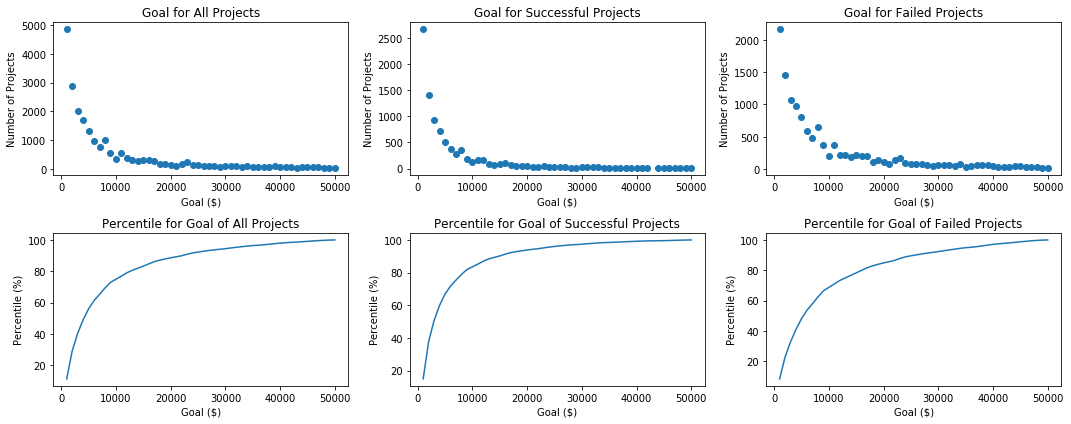

In [7]:
### GOAL FREQUENCY AND PERCENTILE
# same setup as duration

# round goal to nearest 1000
df_all['rounded goal'] = list(df_all['goal'].round(-3))
df_success['rounded goal'] = list(df_success['goal'].round(-3))
df_fail['rounded goal'] = list(df_fail['goal'].round(-3))

# get the frequency of each goal
goal_dict  = df_all.groupby(['rounded goal']).size().to_dict()
success_goal_dict  = df_success.groupby(['rounded goal']).size().to_dict()
fail_goal_dict  = df_fail.groupby(['rounded goal']).size().to_dict()
goal_dicts = [goal_dict, success_goal_dict, fail_goal_dict]

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15, 6))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_goal_dict = goal_dicts[count]
    sorted_goal_dict = dict(sorted(curr_goal_dict.items()))

    goal_lst = []
    for k,v in sorted_goal_dict.items():
        for i in range(v):
            goal_lst.append(k)
    goal_distr_dict = {}
    for i in sorted_goal_dict.keys():
        goal_distr_dict[i] = stats.percentileofscore(goal_lst, i)
        
    # must appear frequently enough to be graphed
    sorted_goal_dict = dict((k, v) for k, v in sorted_goal_dict.items() if v >= 5) 

    plt.subplot(2,3,count+1)
    plt.scatter(list(sorted_goal_dict.keys()), list(sorted_goal_dict.values()))
    plt.xlabel('Goal ($)')
    plt.ylabel('Number of Projects')
    plt.title('Goal for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(goal_distr_dict.keys()), list(goal_distr_dict.values()))
    plt.xlabel('Goal ($)')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile for Goal of ' + title[count])
    
    count += 1

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Goal vs. Probability of Success')

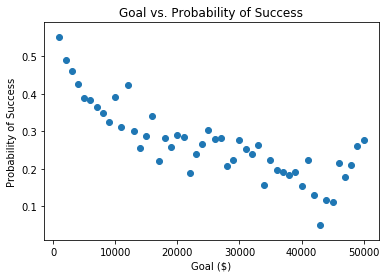

In [10]:
### PROBABILITY OF SUCCESS VS GOAL

# probability of success = number of successful projects / number of total projects given a goal size
prob_success_goal_dict = {}
for k in success_goal_dict.keys():
    if goal_dict[k] > 0: # ensure sufficient number of projects
        prob_success_goal_dict[k] = success_goal_dict[k] / goal_dict[k]

plt.scatter(list(prob_success_goal_dict.keys()),list(prob_success_goal_dict.values()))
plt.xlabel('Goal ($)')
plt.ylabel('Probability of Success')
plt.title('Goal vs. Probability of Success')

{0: 0.4145053723601334, 1000: 0.4145053723601334, 5000: 0.31667486473192324, 10000: 0.27544267572884995, 15000: 0.2448385389094759, 20000: 0.22664564446196295, 25000: 0.21666666666666667, 30000: 0.19809825673534073, 40000: 0.16424116424116425}


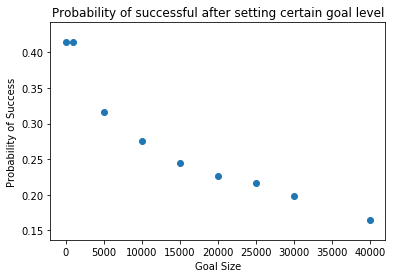

In [13]:
### CDF

thresholds = [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 40000]

dict_all = {}
for i in thresholds:
    dict_all[i] = 0
for k, v in goal_dict.items():
    for j in thresholds:
        if k >= j:
            dict_all[j] += v # count number of projects <= current threshold 
dict_success = {}
for i in thresholds:
    dict_success[i] = 0
for k, v in success_goal_dict.items():
    for j in thresholds:
        if k >= j:
            dict_success[j] += v # count number of successful projects <= current threshold 

dict_prob = {}
for i in thresholds:
    dict_prob[i] = dict_success[i] / dict_all[i]

plt.scatter(dict_prob.keys(), dict_prob.values())
plt.xlabel('Goal Size')
plt.ylabel('Probability of Success')
plt.title('Probability of successful after setting certain goal level')

print(dict_prob)

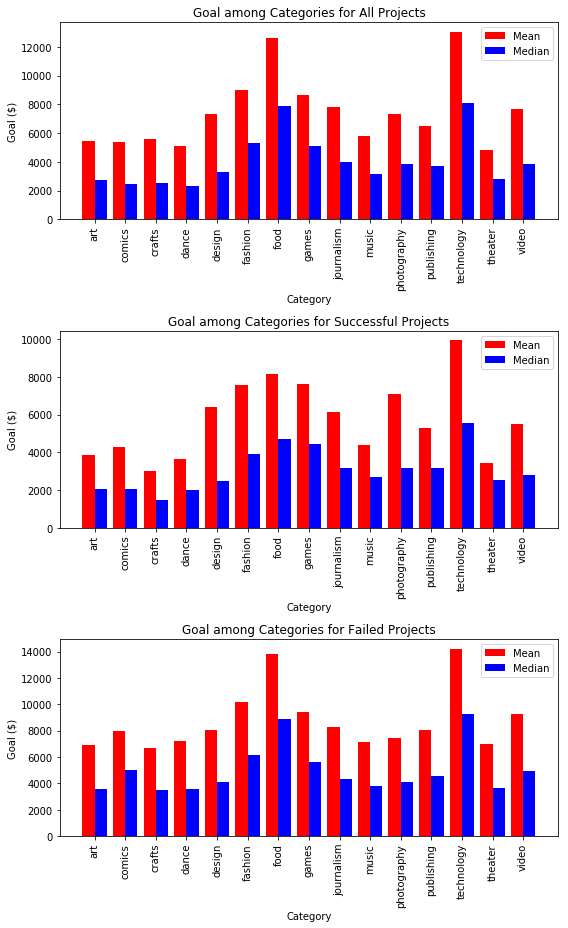

In [10]:
### GOAL FOR EACH CATEGORY
# same setup as duration

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_goal = []
    median_goal = []
    for i in category_keys:
        temp = curr_df.loc[curr_df['category'] == i]
        curr_goal= list(temp['goal'])
        mean_goal.append(sum(curr_goal) / len(curr_goal))
        median_goal.append(statistics.median(curr_goal))

    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_goal, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_goal, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('Goal among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('Goal ($)')
    
    count += 1
    
plt.tight_layout()
plt.show()

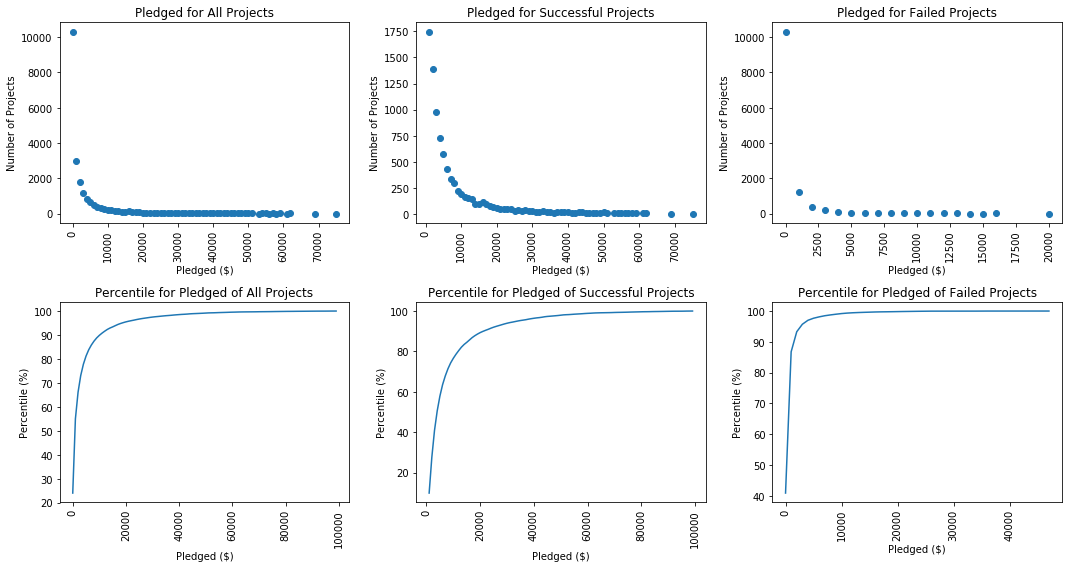

Note: Outliers excluded


In [11]:
### PLEDGED FREQUENCY AND PERCENTILE
# same setup as duration and goal

# round pledged to nearest 1000
df_all['rounded pledged'] = list(df_all['usd_pledged'].round(-3))
df_success['rounded pledged'] = list(df_success['usd_pledged'].round(-3))
df_fail['rounded pledged'] = list(df_fail['usd_pledged'].round(-3))

# get the frequency of each pledged
pledged_dict = df_all.groupby(['rounded pledged']).size().to_dict()
success_pledged_dict = df_success.groupby(['rounded pledged']).size().to_dict()
fail_pledged_dict = df_fail.groupby(['rounded pledged']).size().to_dict()
pledged_dicts = [pledged_dict, success_pledged_dict, fail_pledged_dict]

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15, 8))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_pledged_dict = pledged_dicts[count]
    curr_pledged_dict = dict((k, v) for k, v in curr_pledged_dict.items() if k < 100000) # exclude outliers
    sorted_pledged_dict = dict(sorted(curr_pledged_dict.items()))
    
    pledged_lst = []
    for k,v in sorted_pledged_dict.items():
        for i in range(v):
            pledged_lst.append(k)
    pledged_distr_dict = {}
    for i in sorted_pledged_dict.keys():
        pledged_distr_dict[i] = stats.percentileofscore(pledged_lst, i)
        
    # must appear frequently enough to be graphed
    sorted_pledged_dict = dict((k, v) for k, v in sorted_pledged_dict.items() if v >= 5)

    plt.subplot(2,3,count+1)
    plt.scatter(list(sorted_pledged_dict.keys()), list(sorted_pledged_dict.values()))
    plt.xlabel('Pledged ($)')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Number of Projects')
    plt.title('Pledged for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(pledged_distr_dict.keys()), list(pledged_distr_dict.values()))
    plt.xlabel('Pledged ($)')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile for Pledged of ' + title[count])
    
    count += 1

plt.tight_layout()
plt.show()

print('Note: Outliers excluded')

Text(0.5, 1.0, 'Pledged vs. Probability of Success')

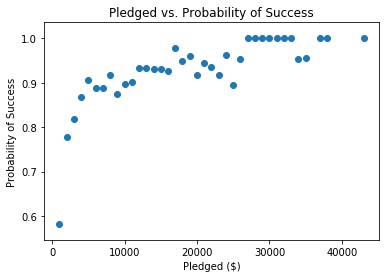

In [12]:
### PROBABILITY OF SUCCESS VS PLEDGED

# probability of success = number of successful projects / number of total projects given a pledged size
prob_success_pledged_dict = {}
for k in success_pledged_dict.keys():
    if pledged_dict[k] > 20: # ensure sufficient number of projects
        prob_success_pledged_dict[k] = success_pledged_dict[k] / pledged_dict[k]

plt.scatter(list(prob_success_pledged_dict.keys()),list(prob_success_pledged_dict.values()))
plt.xlabel('Pledged ($)')
plt.ylabel('Probability of Success')
plt.title('Pledged vs. Probability of Success')

Text(0.5, 1.0, 'Probability of successful after setting certain pledged level')

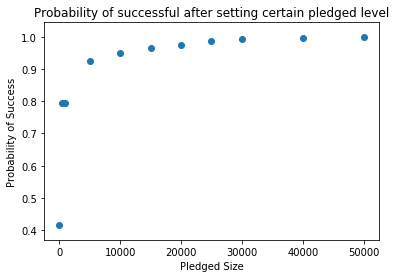

In [13]:
### CDF

thresholds = [0, 500, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000]

dict_all = {}
for i in thresholds:
    dict_all[i] = 0
for k, v in pledged_dict.items():
    for j in thresholds:
        if k >= j:
            dict_all[j] += v # count number of projects <= current threshold 
dict_success = {}
for i in thresholds:
    dict_success[i] = 0
    dict_prob[i] = 0
for k, v in success_pledged_dict.items():
    for j in thresholds:
        if k >= j:
            dict_success[j] += v # count number of successful projects <= current threshold 

dict_prob = {}
for i in thresholds:
    dict_prob[i] = dict_success[i] / dict_all[i]

plt.scatter(dict_prob.keys(), dict_prob.values())
plt.xlabel('Pledged Size')
plt.ylabel('Probability of Success')
plt.title('Probability of successful after setting certain pledged level')

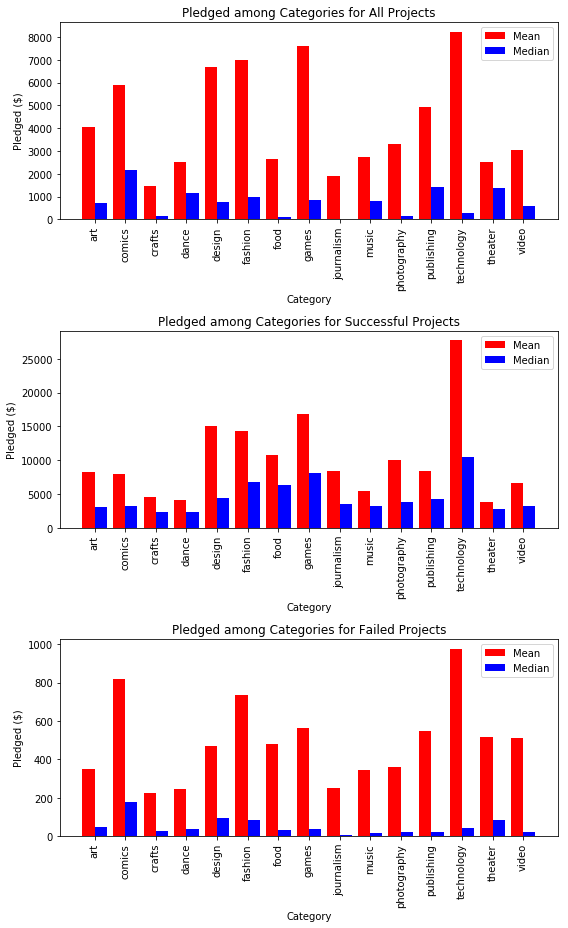

In [14]:
### PLEDGED FOR EACH CATEGORY
# same setup as duration and goal

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
title = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_pledged = []
    median_pledged = []
    for i in category_keys:
        temp = curr_df.loc[curr_df['category'] == i]
        curr_pledged = list(temp['usd_pledged'])
        mean_pledged.append(sum(curr_pledged) / len(curr_pledged))
        median_pledged.append(statistics.median(curr_pledged))

    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_pledged, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_pledged, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('Pledged among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('Pledged ($)')
    
    count += 1
    
plt.tight_layout()
plt.show()

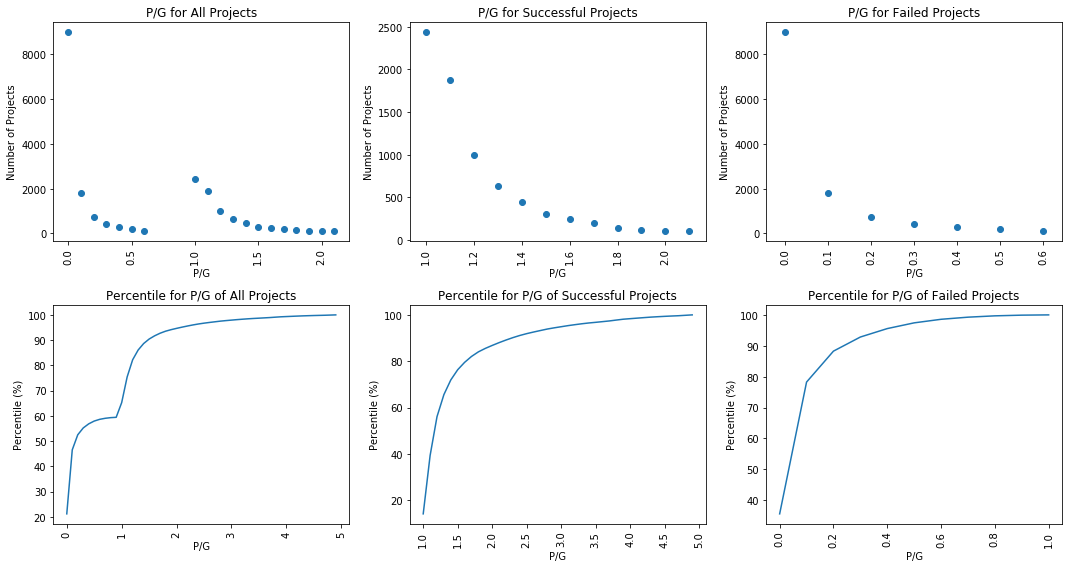

In [15]:
### P/G FREQUENCY AND PERCENTILE
# same setup as duration and goal and pledged

# round p/g to nearest tenth
df_all['rounded p/g'] = list(df_all['P/G'].round(1))
df_success['rounded p/g'] = list(df_success['P/G'].round(1))
df_fail['rounded p/g'] = list(df_fail['P/G'].round(1))

# get the frequency of each p/g
pg_dict = df_all.groupby(['rounded p/g']).size().to_dict()
success_pg_dict = df_success.groupby(['rounded p/g']).size().to_dict()
fail_pg_dict = df_fail.groupby(['rounded p/g']).size().to_dict()
pg_dicts = [pg_dict, success_pg_dict, fail_pg_dict]
print()

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15, 8))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_pg_dict = pg_dicts[count]
    curr_pg_dict = dict((k, v) for k, v in curr_pg_dict.items() if k < 5.0) # exclude outliers
    sorted_pg_dict = dict(sorted(curr_pg_dict.items()))
    
    pg_lst = []
    for k,v in sorted_pg_dict.items():
        for i in range(v):
            pg_lst.append(k)
    pg_distr_dict = {}
    for i in sorted_pg_dict.keys():
        pg_distr_dict[i] = stats.percentileofscore(pg_lst, i)
        
    # must appear frequently enough to be graphed
    sorted_pg_dict = dict((k, v) for k, v in sorted_pg_dict.items() if v >= 100)

    plt.subplot(2,3,count+1)
    plt.scatter(list(sorted_pg_dict.keys()), list(sorted_pg_dict.values()))
    plt.xlabel('P/G')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Number of Projects')
    plt.title('P/G for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(pg_distr_dict.keys()), list(pg_distr_dict.values()))
    plt.xlabel('P/G')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile for P/G of ' + title[count])
    
    count += 1

plt.tight_layout()
plt.show()

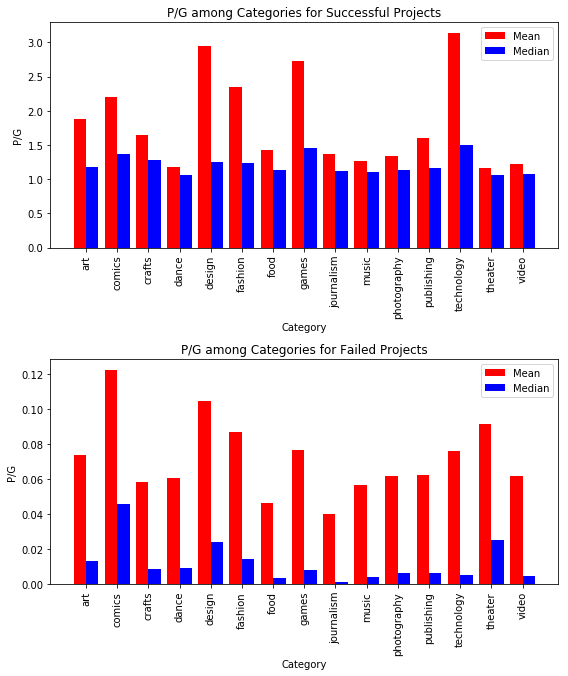

In [16]:
### P/G FOR EACH CATEGORY
# same setup as duration and goal and pledged

df_lst = [df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
title = ['Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_pg = []
    median_pg = []
    for i in category_keys:
        temp = curr_df.loc[curr_df['category'] == i]
        curr_pg = list(temp['P/G'])
        mean_pg.append(sum(curr_pg) / len(curr_pg))
        median_pg.append(statistics.median(curr_pg))

    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_pg, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_pg, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('P/G among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('P/G')
    
    count += 1
    
plt.tight_layout()
plt.show()

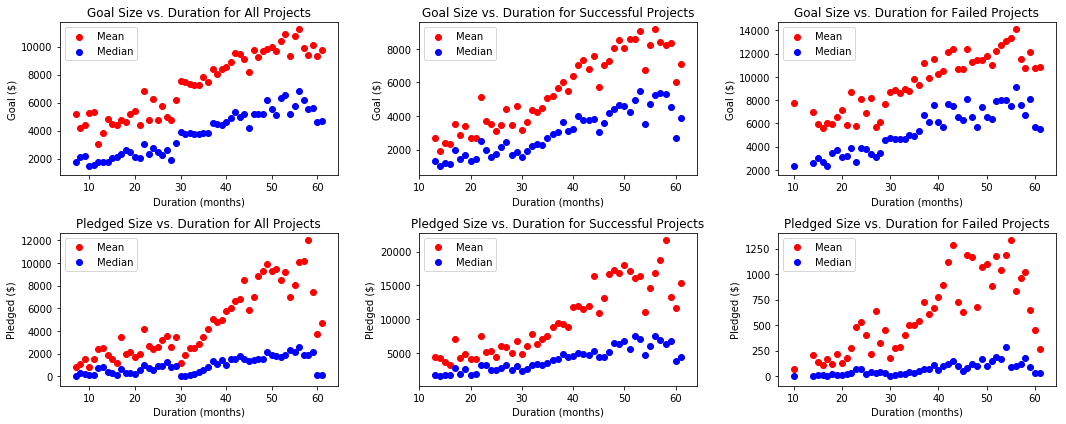

In [17]:
### GOAL VS DURATION

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15,6))
title = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_duration_dict = duration_dicts[count]
    dg_dict = {}
    dp_dict = {}
    for k,v in curr_duration_dict.items():
        if v > 25:
            temp = curr_df.loc[curr_df['rounded duration'] == k]
            dg_dict[round(k)] = list(temp['goal'])
            dp_dict[round(k)] = list(temp['usd_pledged'])

    mean_dg_dict = {}
    median_dg_dict = {}
    for k,v in dg_dict.items():
        mean_dg_dict[k] = sum(v) / len(v)
        median_dg_dict[k] = statistics.median(v)
    mean_dp_dict = {}
    median_dp_dict = {}
    for k,v in dp_dict.items():
        mean_dp_dict[k] = sum(v) / len(v)
        median_dp_dict[k] = statistics.median(v)

    plt.subplot(2,3,count+1)
    plt.scatter(list(mean_dg_dict.keys()), list(mean_dg_dict.values()), color = 'red')
    plt.scatter(list(median_dg_dict.keys()), list(median_dg_dict.values()), color = 'blue')
    plt.ylabel('Goal ($)')
    plt.xlabel('Duration (months)')
    plt.legend(['Mean', 'Median'])
    plt.title('Goal Size vs. Duration for ' + title[count])
    
    plt.subplot(2,3,count+4)
    plt.scatter(list(mean_dp_dict.keys()), list(mean_dp_dict.values()), color = 'red')
    plt.scatter(list(median_dp_dict.keys()), list(median_dp_dict.values()), color = 'blue')
    plt.ylabel('Pledged ($)')
    plt.xlabel('Duration (months)')
    plt.legend(['Mean', 'Median'])
    plt.title('Pledged Size vs. Duration for ' + title[count])
    
    count += 1
    
plt.tight_layout()
plt.show()

In [74]:
### SAVE DATAFRAMES

df_all.to_pickle('../Desktop/saved_dataframes/Foreign_store_subset_allprojects_dgpp.pkl')
df_success.to_pickle('../Desktop/saved_dataframes/Foreign_store_subset_successprojects_dgpp.pkl')
df_fail.to_pickle('../Desktop/saved_dataframes/Foreign_store_subset_failprojects_dgpp.pkl')